In [8]:
#!pip install scikit-learn
!pip install requests

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 702.1 kB/s eta 0:00:0036m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 KB 640.4 kB/s eta 0:00:00 eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 KB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 KB 3.5 MB/s eta 0:00:0031m53.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 KB 1.3 MB/s eta 0:00:0031m98.6 MB/s eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

In [28]:
#from js import fetch
import io
import requests

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = requests.get(URL1).text
data = pd.read_csv(URL1)

"""
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)
"""

"\ndata = pd.read_csv(text1)\n\nURL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'\nresp2 = await fetch(URL2)\ntext2 = io.BytesIO((await resp2.arrayBuffer()).to_py())\nX = pd.read_csv(text2)\n"

In [2]:
#from js import fetch
import io

df = pd.read_csv("./data/dataset_part_2.csv")
df_one_hot = pd.read_csv("./data/dataset_part_3.csv")
print(df.shape," - ",df_one_hot.shape)

(90, 18)  -  (90, 80)


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [151]:
models = {}

In [ ]:
#t1

In [51]:
x = df_one_hot
y = np.asanyarray(df["Class"])

In [43]:
#t2

In [52]:
x = preprocessing.StandardScaler().fit_transform(x)
x = preprocessing.normalize(x,norm='l1')
x.shape

(90, 80)

In [53]:
#t3

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 2)

In [56]:
#t4

In [152]:
lr = LogisticRegression()
"""
{'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
"""
parameters = {'C':[1,0.1,0.01], 'penalty':['l2'], 'solver':['lbfgs', 'liblinear']}
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']})

In [153]:
print("best parameters= {0}".format(logreg_cv.best_params_))
print("best estimator = {0}".format(logreg_cv.best_estimator_))
print("best score = {0}".format(logreg_cv.best_score_))

best parameters= {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
best estimator = LogisticRegression(C=1)
best score = 0.6678571428571429


score with test data = 0.6666666666666666


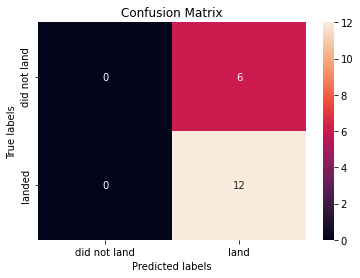

In [155]:
yhat = logreg_cv.predict(x_test)
score = logreg_cv.score(x_test,y_test)
print("score with test data = {0}".format(score))
plot_confusion_matrix(y_test,yhat)
models["logistic regression"] = score

In [182]:
#t6
svmModel = svm.SVC()
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_cv = GridSearchCV(svmModel, parameters, cv = 10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [183]:
print("best parameters= {0}".format(svm_cv.best_params_))
print("best estimator = {0}".format(svm_cv.best_estimator_))
print("best score = {0}".format(svm_cv.best_score_))

best parameters= {'C': 1.0, 'gamma': 31.622776601683793, 'kernel': 'sigmoid'}
best estimator = SVC(gamma=31.622776601683793, kernel='sigmoid')
best score = 0.8482142857142858


score with test data = 0.8333333333333334


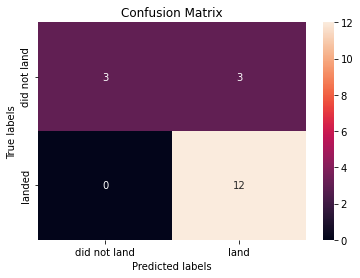

In [184]:
yhat = svm_cv.predict(x_test)
score = svm_cv.score(x_test,y_test)
print("score with test data = {0}".format(score))
plot_confusion_matrix(y_test,yhat)
models["SVM"] = score

In [108]:
#t8

In [156]:
drugTree = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[2*n for n in range(1, 10)],
               'max_features':['auto', 'sqrt'], 'min_samples_leaf':[1, 2, 4], 'min_samples_split':[2, 5, 10]}
tree_cv = GridSearchCV(drugTree,parameters,cv = 10)
tree_cv.fit(x_train,y_train)

/home/deivith/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deivith/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deivith/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/deivith/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/dei

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [157]:
print("best parameters= {0}".format(tree_cv.best_params_))
print("best estimator = {0}".format(tree_cv.best_estimator_))
print("best score = {0}".format(tree_cv.best_score_))

best parameters= {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
best estimator = DecisionTreeClassifier(max_depth=16, max_features='sqrt', splitter='random')
best score = 0.8607142857142858


Score for y test  = 0.8333333333333334


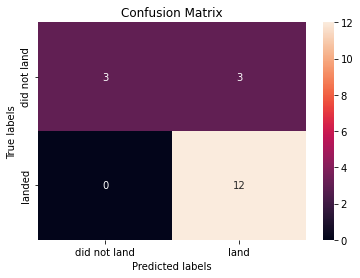

In [158]:
yhat = tree_cv.predict(x_test)
score = tree_cv.score(x_test,y_test)
print("Score for y test  = {}".format(score))
models["Tree classifier"] = score
plot_confusion_matrix(y_test,yhat)

In [135]:
#t10

In [160]:
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]}
neigh = KNeighborsClassifier()
knn_cv = GridSearchCV(neigh, parameters, cv = 10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [161]:
print("best parameters= {0}".format(knn_cv.best_params_))
print("best estimator = {0}".format(knn_cv.best_estimator_))
print("best score = {0}".format(knn_cv.best_score_))

best parameters= {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
best estimator = KNeighborsClassifier(n_neighbors=4, p=1)
best score = 0.8339285714285714


Score for y test  = 0.7777777777777778


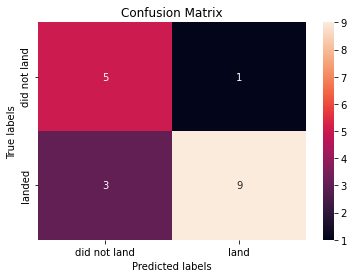

In [162]:
yhat = knn_cv.predict(x_test)
score = knn_cv.score(x_test,y_test)
print("Score for y test  = {}".format(knn_cv.score(x_test,y_test)))
models["KNN"] = score
plot_confusion_matrix(y_test,yhat)

In [163]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.90      0.75      0.82        12

    accuracy                           0.78        18
   macro avg       0.76      0.79      0.77        18
weighted avg       0.81      0.78      0.78        18



In [179]:
#models = pd.Series(models)
print("the best model was = {} ".format(models.index[np.argmax(models)]))

the best model was = Tree classifier 


In [180]:
y_test.shape

(18,)